In [3]:
from collections import Counter
from glob import glob 
from utils.cleaner import cleanTexts
import pickle
import pandas as pd
import numpy as np
# import seaborn as sns
from collections import Counter
from glob import glob 
path =  "data/dataset"
data = cleanTexts(path,lematizer = False,stopword=True,steaming = False,extractor=False)
file_pi = open('dataCleaned.obj', 'wb') 
pickle.dump(data, file_pi)

Extrayendo carpeta Politica...
Extrayendo carpeta Deporte...
Extrayendo carpeta Salud...
Extrayendo documento  575 ...
Procesado instancia 211 ...
Procesado instancia 181 ...
Procesado instancia 181 ...


In [13]:
df = pd.DataFrame({},columns=["method","class1","class2","class3","realClass"])
a_series = pd.DataFrame(np.random.uniform(size=(4,3)), columns= ["class1","class2","class3"])
df = df.append(a_series,ignore_index=True)
df["method"]

,method,class1,class2,class3,realClass
0,NaN,0.865838,0.436294,0.651894,NaN
1,NaN,0.373851,0.248180,0.723941,NaN
2,NaN,0.787676,0.411538,0.310473,NaN
3,NaN,0.323489,0.922680,0.033595,NaN


In [8]:
np.random.uniform(size=(4,3))

array([[0.76706623, 0.86362708, 0.8181446 ],
       [0.90730322, 0.91194165, 0.87268847],
       [0.765538  , 0.34913962, 0.41483154],
       [0.2146737 , 0.73748554, 0.23181903]])

In [14]:
filehandler = open("dataCleaned.obj", 'rb') 
data = pickle.load(filehandler)
df = pd.DataFrame({},columns=["text","class"])
for i in range(len(data)):
        df = df.append(pd.DataFrame(data[i], columns=df.columns),ignore_index=True)

In [15]:
data

[[['Muere lanzador CJ Hunter exmarido Marion Jones El lanzador peso estadounidense falleció martes causas desconocidas Campeón mundial Sevilla implicados trama Balco dopaje El exlanzador peso estadounidense falleció viernes edad años según informó Asociación Estadounidense Entrenadores Lanzamientos apuntó causas deceso Cottrell James Hunter III nació diciembre Wahington D C En etapa universitaria compitió Penn State University aún récord pista cubierta aire libre institución salió graduado Ciencias Políticas Su mejor marca personal metros conseguidos Trials olímpicos Estados Unidos año Hunter conocido haber ganado oro Mundial Sevilla bronce dos años Atenas Pero recordará positivo dio nandrolona año dio comienzo famoso caso BALCO vieron implicadas varias estrellas deporte estadounidense Entre mujer velocista casado tras conocerse volver encontrarse etapa entrenador North Carolina University El escándalo trama BALCO acabó Jones desposeída tres oros dos bronces ganó Sídney acabó matrimoni

In [74]:
texts = df[df["class"]==3]["text"].to_numpy().flatten()
textClass = ""
for elem in texts:
    textClass+=elem
textClass = textClass.split(" ")

In [75]:
from collections import Counter


 # equals to list(set(words))
 #
dfFiltered = pd.DataFrame({},columns=["word","count"])
dfFiltered["word"] = list(Counter(textClass).keys())
dfFiltered["count"] = list(Counter(textClass).values())
dataFiltered = dfFiltered.sort_values(by="count",ascending=False).head(5)

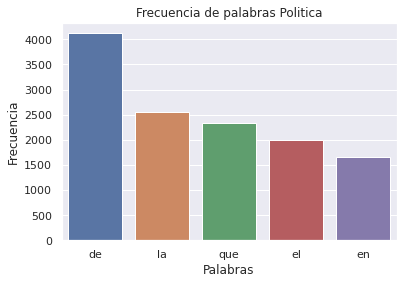

In [76]:
sns.set(font_scale=1) 
ax = sns.barplot(x="word", y="count", data=dataFiltered)
ax.set(xlabel='Palabras', ylabel='Frecuencia')
ax.set_title("Frecuencia de palabras Politica")
ax.figure.savefig('PalabrasConStopWordsPolitica.png',dpi=600)